# **Stock Sentimental Analysis Using Machine Learning Models:**

**Import Libraries:** Import necessary libraries like pandas, nltk, sklearn, imblearn, and streamlit.
Load and Preprocess Data: Load your data, preprocess text by lowercasing, removing stop words, and lemmatizing.

**Feature Extraction:** Use TfidfVectorizer to convert text into numerical features.
Data Splitting and Balancing: Split data into training and testing sets. Balance the training set using SMOTE to address class imbalance.  

**Model Training:** Train different classification models (Logistic Regression, Naive Bayes, SVM) on the balanced training data.  

**Streamlit App:**
Create a title for your app.
Get user input using st.text_input.
Preprocess user input.
Transform user input into features using the same vectorizer.
Make predictions using each trained model and display the results.

In [1]:
!pip install scikit-learn pandas nltk streamlit imbalanced-learn

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import streamlit as st
import preprocess
import pickle
from joblib import load
import joblib

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enimi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\enimi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Loading the dataset
data = pd.read_csv('stock_sentiment.csv', encoding = 'ISO-8859-1')

# Exploring the dataset

In [4]:
data.columns

Index(['Text', 'Sentiment'], dtype='object')

In [5]:
data.shape

(5791, 2)

In [6]:
data.head(5)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


# **Sentiment Distribution Visualization:**
*   **Group and count sentiment values.**

In [7]:
# Group the data by sentiment and count the number of entries for each sentiment
temp = data.groupby('Sentiment').count()['Text'].reset_index().sort_values(by='Text', ascending=False)

# Apply background gradient styling to the 'temp' DataFrame
styled_temp = temp.style.background_gradient(cmap='Purples')
styled_temp

,Sentiment,Text
1,1,3685
0,0,2106


*   **Visualize sentiment distribution using a Funnel-Chart.**

In [8]:
# Create a Funnel-Chart using Plotly to visualize sentiment distribution
from plotly import graph_objs as go
fig = go.Figure(go.Funnelarea(
    text=temp.Sentiment,
    values=temp.Text,
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
))
# Show the Funnel-Chart using the specified renderer
fig.show()

# **Data Cleaning and Preprocessing**

In [9]:
# Finding any NaN values
data.isna().any()

Text         False
Sentiment    False
dtype: bool

In [10]:
# Preprocess tweets for NLP analysis
data = preprocess.Preprocess_Tweets(data)
display(data)

c:\Users\enimi\anaconda3\envs\dev\lib\site-packages\pandas\core\strings\object_array.py:172: FutureWarning:

Possible nested set at position 1



,Text,Sentiment,Text_Cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,aap movie 55 percent return for the fea and ge...
2,user I'd be afraid to short AMZN - they are lo...,1,id be afraid to short amzn to they are looking...
3,MNTA Over 12.00,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,industry body cii said are likely to suffer a ...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,prices slip below rs 46000 as book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10 perc...
5789,"#Sharemarket LIVE: Sensex off dayâs high, up...",1,live sensex off days high up 600 points test...


In [11]:
# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

data['Processed_Text'] = data['Text_Cleaned'].apply(preprocess_text)



In [12]:
# Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Processed_Text'])
y = data['Sentiment']
# Save the fitted tfidf_vectorizer to a file
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')



['tfidf_vectorizer.joblib']

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [14]:
# Train different classification models
import joblib
models = {
    "Logistic Regression": LogisticRegression(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC()
}

trained_models = {}
Lonasvm=[]
model_accuracy=[]
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    trained_models[model_name] = model
    Lonasvm.append(model_name)

     # Make predictions
    print(f"\nModel: {model_name}")
    y_pred = model.predict(X_test)

     # Print evaluation metrics
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    model_accuracy.append(accuracy_score(y_test, y_pred)*100)
    print(classification_report(y_test, y_pred))

    # Save the model
    joblib.dump(model, f"{model_name.replace(' ', '_')}_model.pkl")





Model: Logistic Regression
Confusion Matrix:
[[296 131]
 [124 608]]
Accuracy: 0.7799827437446074
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       427
           1       0.82      0.83      0.83       732

    accuracy                           0.78      1159
   macro avg       0.76      0.76      0.76      1159
weighted avg       0.78      0.78      0.78      1159


Model: Multinomial Naive Bayes
Confusion Matrix:
[[311 116]
 [173 559]]
Accuracy: 0.7506471095772217
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       427
           1       0.83      0.76      0.79       732

    accuracy                           0.75      1159
   macro avg       0.74      0.75      0.74      1159
weighted avg       0.76      0.75      0.75      1159


Model: Support Vector Machine
Confusion Matrix:
[[225 202]
 [ 45 687]]
Accuracy: 0.7868852459016393
              precision    recall  f1-score  

In [15]:
Lonasvm
model_accuracy

[77.99827437446073, 75.06471095772217, 78.68852459016394]

In [16]:
user_input = input("Enter text:")

if user_input:
    processed_input = preprocess_text(user_input)
    input_features = vectorizer.transform([processed_input])

    for model_name, model in trained_models.items():
        prediction = model.predict(input_features)[0]
        sentiment = "Positive" if prediction == 1 else "Negative"
        print(f"{model_name}: {sentiment}")

Logistic Regression: Positive
Multinomial Naive Bayes: Positive
Support Vector Machine: Positive


c:\Users\enimi\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



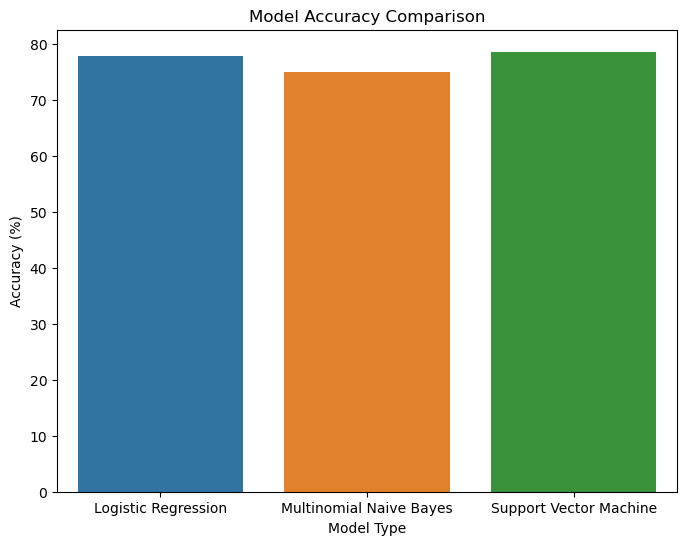

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data
x = Lonasvm
y = model_accuracy

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=x, y=y)


# Add labels and title
plt.xlabel('Model Type')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')



# Show the plot
plt.show()